In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

### Taking Care of Null Values in Categorical Variables

In [3]:
## For categorical vaiables "Alley", "FireplaceQu", "PoolQC" and "Fence" NA means "that category is not present in that house
## So let`s just update it as "No" + "particular category" 

train['Alley'].fillna('No Alley',inplace = 1)
train['FireplaceQu'].fillna("No Fireplace", inplace = 1)
train['PoolQC'].fillna('No Pool',inplace = 1)
train['Fence'].fillna('No Fence',inplace = 1)

## The case is similar with these below categorical variables as well
train['GarageType'].fillna('No Garage',inplace = True)
train['GarageCond'].fillna('No Garage',inplace = True)
train['GarageFinish'].fillna('No Garage',inplace = True)
train['GarageQual'].fillna('No Garage',inplace = True)
train['BsmtCond'].fillna('No Basement',inplace = True)
train['BsmtQual'].fillna('No Basement',inplace = True)
train['BsmtExposure'].fillna('No Basement',inplace = True)
train['BsmtFinType1'].fillna('No Basement',inplace = True)
train['BsmtFinType2'].fillna('No Basement',inplace = True)

In [ ]:
## Let`s check out how dows the values in MiscFeature vary the SalePrice

print train['MiscFeature'].value_counts()
sns.boxplot(x= 'MiscFeature', y= 'SalePrice', data= train)

In [4]:
## The "MiscFeature" category has a large no. of null values which doesnot give any idea about how that feature is affecting
## the house sale price. Thus we can remove it
train.drop('MiscFeature',1,inplace = 1)

In [5]:
## The categories which still have null values are "Electrical" and "MasVnrType".
## But they have very less no of null values which can be filled as "NULL"

train['Electrical'].fillna('Null',inplace = True)
train['MasVnrType'].fillna('Null',inplace = True)

In [ ]:
print train['Electrical'].value_counts()
print train['MasVnrType'].value_counts()

sns.set(rc={"figure.figsize": (10, 10)},font_scale=1)
f, (ax1, ax2) = plt.subplots(1, 2)
sns.boxplot(x= 'MasVnrType', y= 'SalePrice', data= train, ax= ax1)
sns.boxplot(x='Electrical', y= 'SalePrice', data= train, ax= ax2)

### Taking care of Null values in Numerical Variables

In [6]:
train['LotFrontage'].fillna(train['LotFrontage'].mean(), inplace= True)
train['GarageYrBlt'].fillna(train['GarageYrBlt'].mode().iloc[0], inplace= True)
train['MasVnrArea'].fillna(train['MasVnrArea'].mode().iloc[0], inplace= True)

### Feature Selection

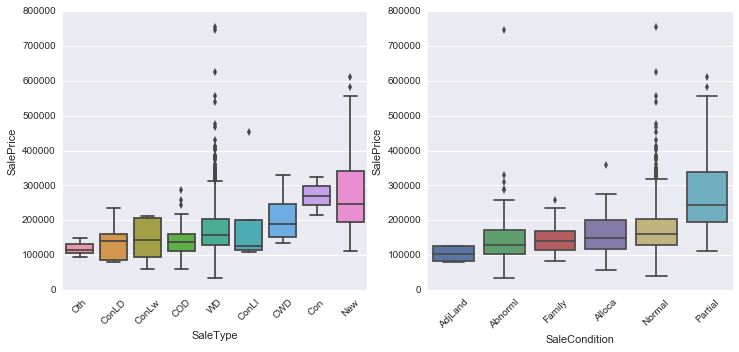

In [11]:
## SaleType and SaleCondition

sns.set(rc={"figure.figsize": (12, 5)},font_scale=1)
f, (ax1, ax2) = plt.subplots(1, 2)

g1= sns.boxplot(x= 'SaleType', y= 'SalePrice', data= train, ax= ax1, \
                order= train.groupby('SaleType')['SalePrice'].mean().sort_values().index)
g2= sns.boxplot(x='SaleCondition', y= 'SalePrice', data= train, ax= ax2, \
                order= train.groupby('SaleCondition')['SalePrice'].mean().sort_values().index)

g1.set_xticklabels(g1.get_xticklabels(), rotation= 45);
g2.set_xticklabels(g2.get_xticklabels(), rotation= 45);

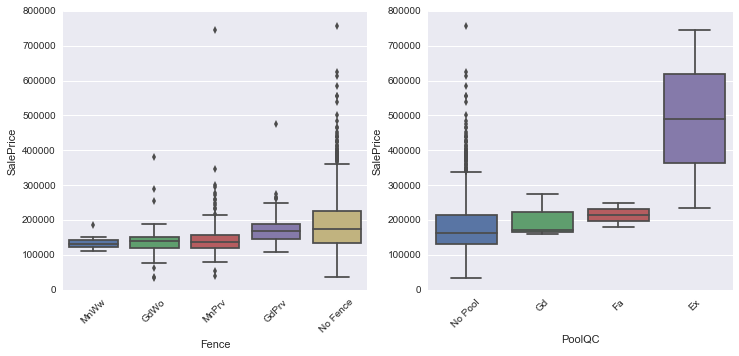

In [12]:
## Fence and PoolQC

sns.set(rc={"figure.figsize": (12, 5)},font_scale=1)
f, (ax1, ax2) = plt.subplots(1, 2)

g1= sns.boxplot(x= 'Fence', y= 'SalePrice', data= train, ax= ax1, \
                order= train.groupby('Fence')['SalePrice'].mean().sort_values().index)
g2= sns.boxplot(x='PoolQC', y= 'SalePrice', data= train, ax= ax2, \
                order= train.groupby('PoolQC')['SalePrice'].mean().sort_values().index)

g1.set_xticklabels(g1.get_xticklabels(), rotation= 45);
g2.set_xticklabels(g2.get_xticklabels(), rotation= 45);

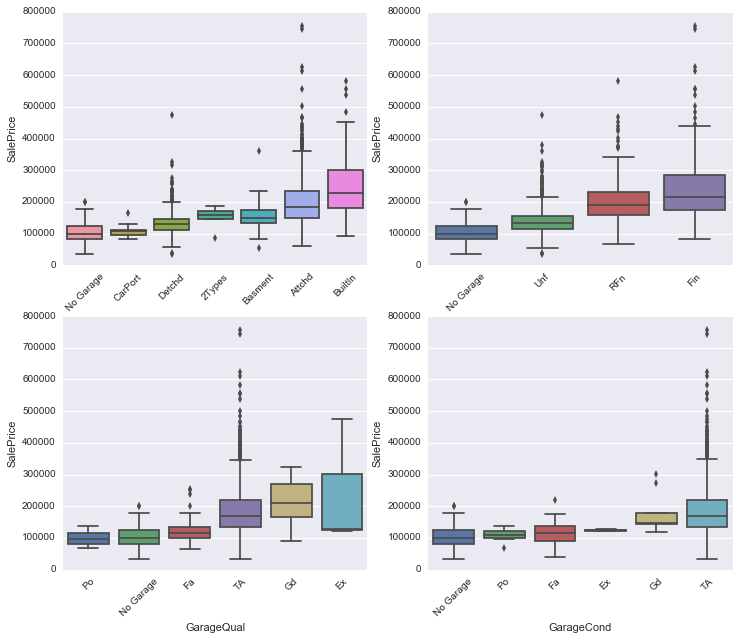

In [14]:
## Garage

sns.set(rc={"figure.figsize": (12, 10)},font_scale=1)
f, araxs = plt.subplots(2, 2)

g1= sns.boxplot(x= 'GarageType', y= 'SalePrice', data= train, ax= araxs[0,0], \
                order= train.groupby('GarageType')['SalePrice'].mean().sort_values().index)
g2= sns.boxplot(x='GarageFinish', y= 'SalePrice', data= train, ax= araxs[0,1], \
                order= train.groupby('GarageFinish')['SalePrice'].mean().sort_values().index)
g3= sns.boxplot(x= 'GarageQual', y= 'SalePrice', data= train, ax= araxs[1,0], \
                order= train.groupby('GarageQual')['SalePrice'].mean().sort_values().index)
g4= sns.boxplot(x='GarageCond', y= 'SalePrice', data= train, ax= araxs[1,1], \
                order= train.groupby('GarageCond')['SalePrice'].mean().sort_values().index)


g1.set_xticklabels(g1.get_xticklabels(), rotation= 45);
g2.set_xticklabels(g2.get_xticklabels(), rotation= 45);
g3.set_xticklabels(g3.get_xticklabels(), rotation= 45);
g4.set_xticklabels(g4.get_xticklabels(), rotation= 45);

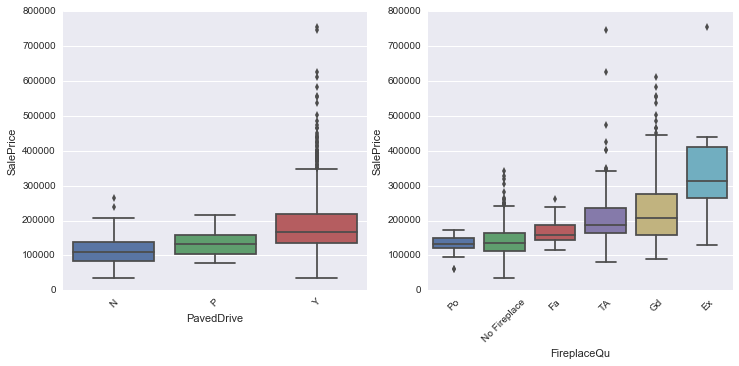

In [16]:
## PavedDrive and FireplaceQu

sns.set(rc={"figure.figsize": (12, 5)},font_scale=1)
f, (ax1, ax2) = plt.subplots(1, 2)

g1= sns.boxplot(x= 'PavedDrive', y= 'SalePrice', data= train, ax= ax1, \
                order= train.groupby('PavedDrive')['SalePrice'].mean().sort_values().index)
g2= sns.boxplot(x='FireplaceQu', y= 'SalePrice', data= train, ax= ax2, \
                order= train.groupby('FireplaceQu')['SalePrice'].mean().sort_values().index)

g1.set_xticklabels(g1.get_xticklabels(), rotation= 45);
g2.set_xticklabels(g2.get_xticklabels(), rotation= 45);

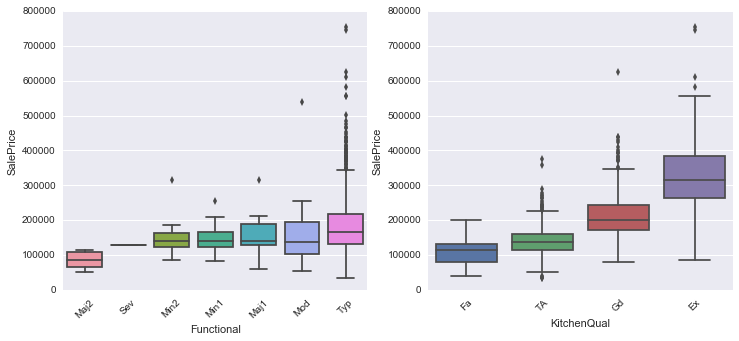

In [17]:
## Functional and KitchenQual

sns.set(rc={"figure.figsize": (12, 5)},font_scale=1)
f, (ax1, ax2) = plt.subplots(1, 2)

g1= sns.boxplot(x= 'Functional', y= 'SalePrice', data= train, ax= ax1, \
                order= train.groupby('Functional')['SalePrice'].mean().sort_values().index)
g2= sns.boxplot(x='KitchenQual', y= 'SalePrice', data= train, ax= ax2, \
                order= train.groupby('KitchenQual')['SalePrice'].mean().sort_values().index)

g1.set_xticklabels(g1.get_xticklabels(), rotation= 45);
g2.set_xticklabels(g2.get_xticklabels(), rotation= 45);

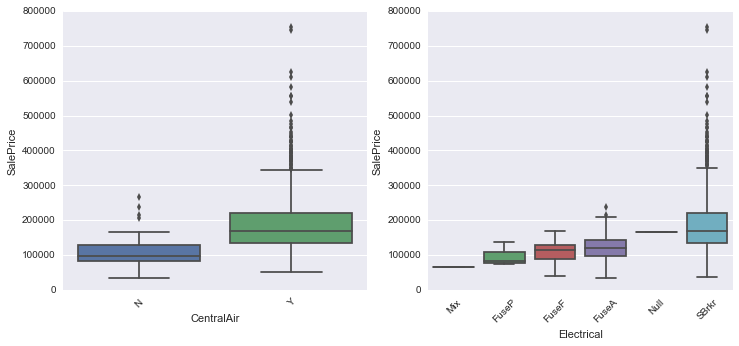

In [18]:
## CentralAir and Electrical

sns.set(rc={"figure.figsize": (12, 5)},font_scale=1)
f, (ax1, ax2) = plt.subplots(1, 2)

g1= sns.boxplot(x= 'CentralAir', y= 'SalePrice', data= train, ax= ax1, \
                order= train.groupby('CentralAir')['SalePrice'].mean().sort_values().index)
g2= sns.boxplot(x='Electrical', y= 'SalePrice', data= train, ax= ax2, \
                order= train.groupby('Electrical')['SalePrice'].mean().sort_values().index)

g1.set_xticklabels(g1.get_xticklabels(), rotation= 45);
g2.set_xticklabels(g2.get_xticklabels(), rotation= 45);

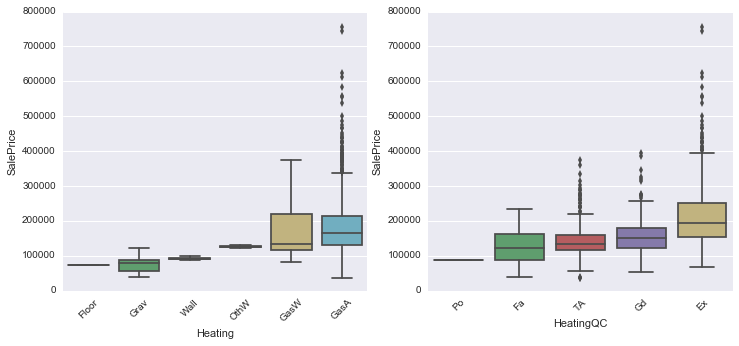

In [19]:
## Heating and HeatingQC

sns.set(rc={"figure.figsize": (12, 5)},font_scale=1)
f, (ax1, ax2) = plt.subplots(1, 2)

g1= sns.boxplot(x= 'Heating', y= 'SalePrice', data= train, ax= ax1, \
                order= train.groupby('Heating')['SalePrice'].mean().sort_values().index)
g2= sns.boxplot(x='HeatingQC', y= 'SalePrice', data= train, ax= ax2, \
                order= train.groupby('HeatingQC')['SalePrice'].mean().sort_values().index)

g1.set_xticklabels(g1.get_xticklabels(), rotation= 45);
g2.set_xticklabels(g2.get_xticklabels(), rotation= 45);

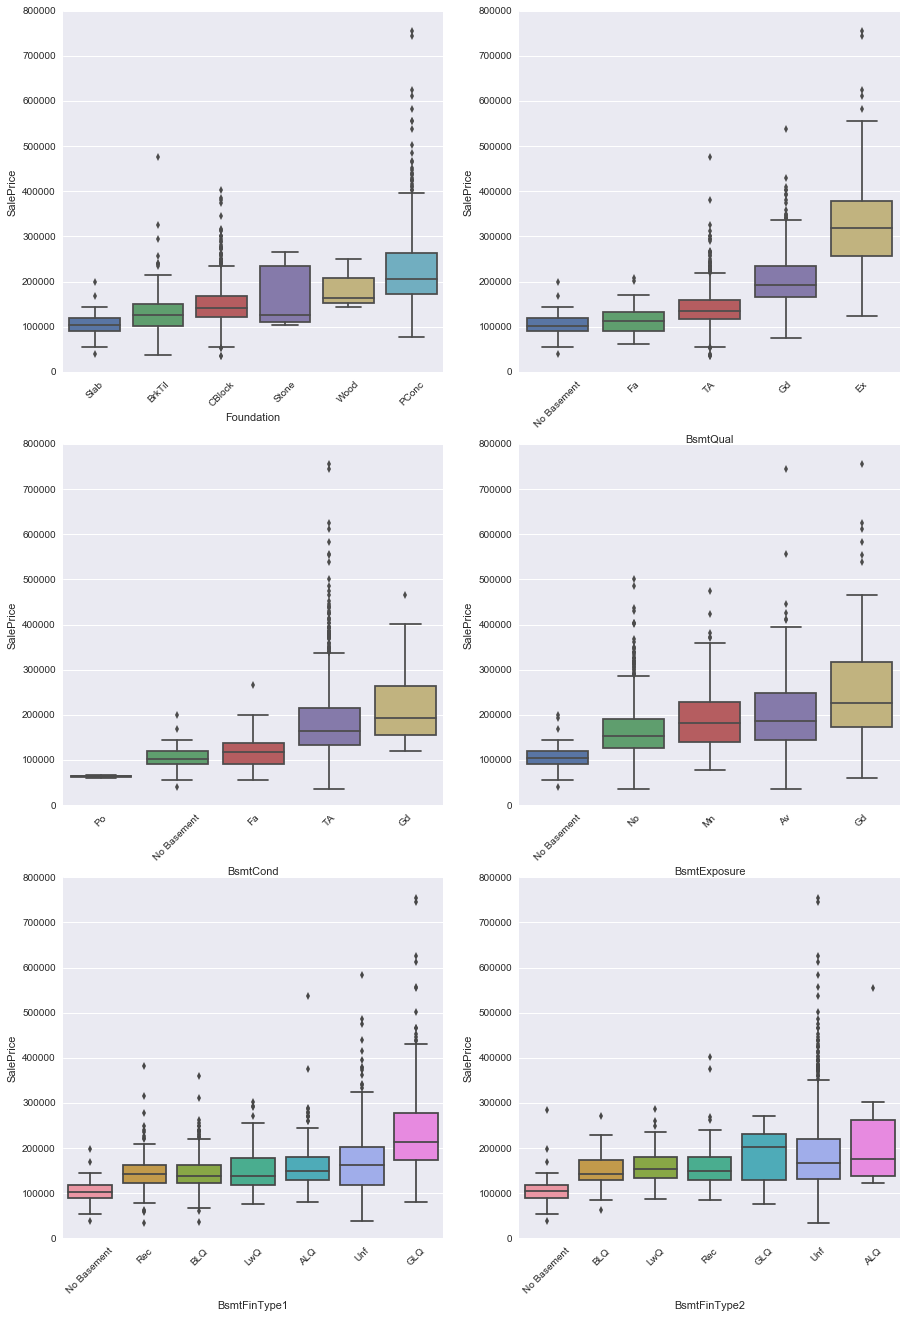

In [28]:
## Foundation and Basement

sns.set(rc={"figure.figsize": (15, 22)},font_scale=1)
f, arraxs = plt.subplots(3,2)

g1= sns.boxplot(x= 'Foundation', y= 'SalePrice', data= train, ax= arraxs[0,0], \
                order= train.groupby('Foundation')['SalePrice'].mean().sort_values().index)
g2= sns.boxplot(x='BsmtQual', y= 'SalePrice', data= train, ax= arraxs[0,1], \
                order= train.groupby('BsmtQual')['SalePrice'].mean().sort_values().index)
g3= sns.boxplot(x= 'BsmtCond', y= 'SalePrice', data= train, ax= arraxs[1,0], \
                order= train.groupby('BsmtCond')['SalePrice'].mean().sort_values().index)
g4= sns.boxplot(x='BsmtExposure', y= 'SalePrice', data= train, ax= arraxs[1,1], \
                order= train.groupby('BsmtExposure')['SalePrice'].mean().sort_values().index)
g5= sns.boxplot(x= 'BsmtFinType1', y= 'SalePrice', data= train, ax= arraxs[2,0], \
                order= train.groupby('BsmtFinType1')['SalePrice'].mean().sort_values().index)
g6= sns.boxplot(x='BsmtFinType2', y= 'SalePrice', data= train, ax= arraxs[2,1], \
                order= train.groupby('BsmtFinType2')['SalePrice'].mean().sort_values().index)

g1.set_xticklabels(g1.get_xticklabels(), rotation= 45);
g2.set_xticklabels(g2.get_xticklabels(), rotation= 45);
g3.set_xticklabels(g3.get_xticklabels(), rotation= 45);
g4.set_xticklabels(g4.get_xticklabels(), rotation= 45);
g5.set_xticklabels(g5.get_xticklabels(), rotation= 45);
g6.set_xticklabels(g6.get_xticklabels(), rotation= 45);

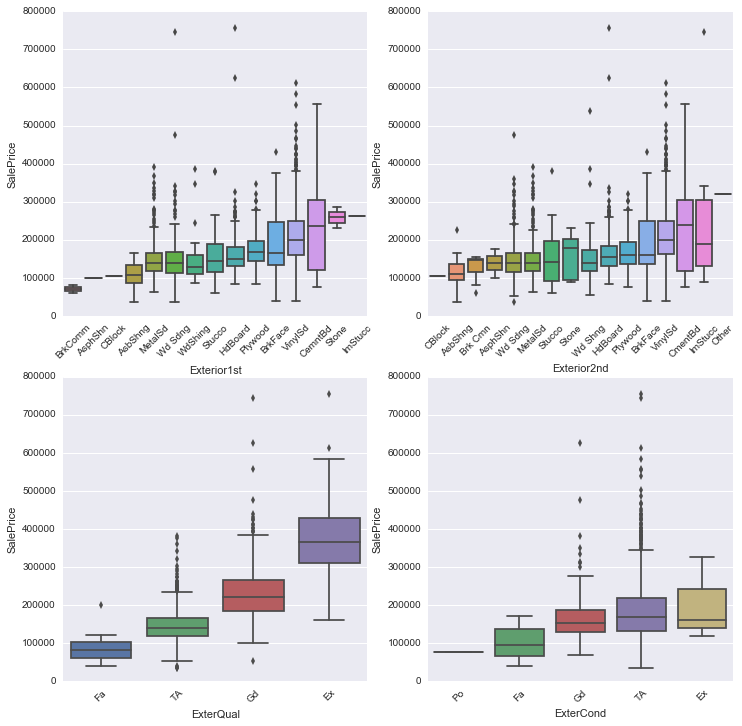

In [30]:
## Exterior

sns.set(rc={"figure.figsize": (12, 12)},font_scale=1)
f, araxs = plt.subplots(2, 2)

g1= sns.boxplot(x= 'Exterior1st', y= 'SalePrice', data= train, ax= araxs[0,0], \
                order= train.groupby('Exterior1st')['SalePrice'].mean().sort_values().index)
g2= sns.boxplot(x='Exterior2nd', y= 'SalePrice', data= train, ax= araxs[0,1], \
                order= train.groupby('Exterior2nd')['SalePrice'].mean().sort_values().index)
g3= sns.boxplot(x= 'ExterQual', y= 'SalePrice', data= train, ax= araxs[1,0], \
                order= train.groupby('ExterQual')['SalePrice'].mean().sort_values().index)
g4= sns.boxplot(x='ExterCond', y= 'SalePrice', data= train, ax= araxs[1,1], \
                order= train.groupby('ExterCond')['SalePrice'].mean().sort_values().index)


g1.set_xticklabels(g1.get_xticklabels(), rotation= 45);
g2.set_xticklabels(g2.get_xticklabels(), rotation= 45);
g3.set_xticklabels(g3.get_xticklabels(), rotation= 45);
g4.set_xticklabels(g4.get_xticklabels(), rotation= 45);

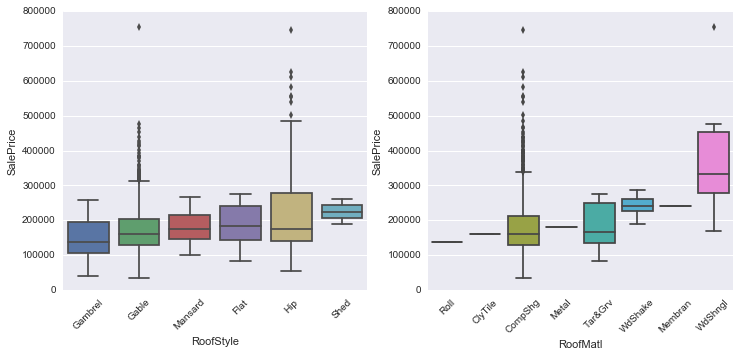

In [31]:
## Roof

sns.set(rc={"figure.figsize": (12, 5)},font_scale=1)
f, (ax1, ax2) = plt.subplots(1, 2)

g1= sns.boxplot(x= 'RoofStyle', y= 'SalePrice', data= train, ax= ax1, \
                order= train.groupby('RoofStyle')['SalePrice'].mean().sort_values().index)
g2= sns.boxplot(x='RoofMatl', y= 'SalePrice', data= train, ax= ax2, \
                order= train.groupby('RoofMatl')['SalePrice'].mean().sort_values().index)

g1.set_xticklabels(g1.get_xticklabels(), rotation= 45);
g2.set_xticklabels(g2.get_xticklabels(), rotation= 45);

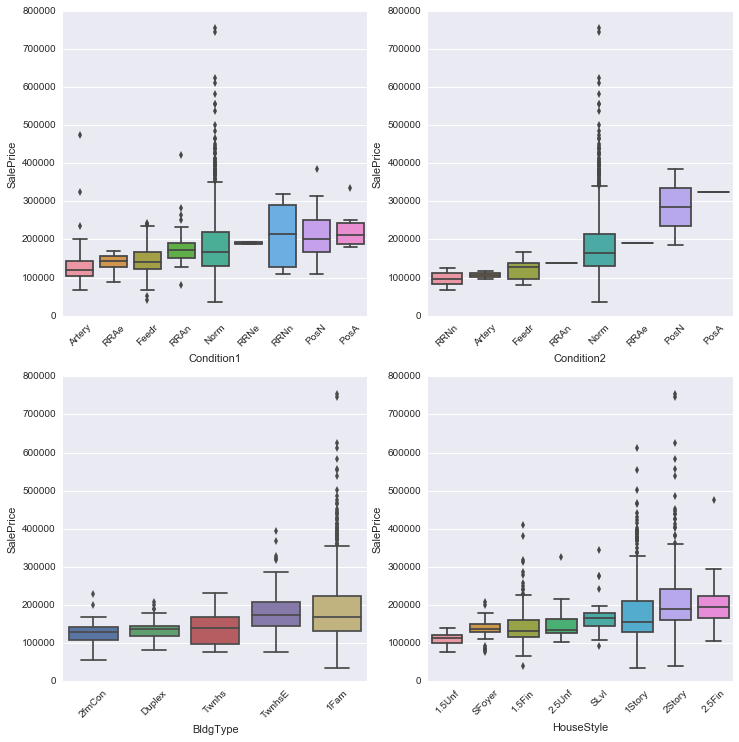

In [32]:
## House and it`s conditions

sns.set(rc={"figure.figsize": (12, 12)},font_scale=1)
f, araxs = plt.subplots(2, 2)

g1= sns.boxplot(x= 'Condition1', y= 'SalePrice', data= train, ax= araxs[0,0], \
                order= train.groupby('Condition1')['SalePrice'].mean().sort_values().index)
g2= sns.boxplot(x='Condition2', y= 'SalePrice', data= train, ax= araxs[0,1], \
                order= train.groupby('Condition2')['SalePrice'].mean().sort_values().index)
g3= sns.boxplot(x= 'BldgType', y= 'SalePrice', data= train, ax= araxs[1,0], \
                order= train.groupby('BldgType')['SalePrice'].mean().sort_values().index)
g4= sns.boxplot(x='HouseStyle', y= 'SalePrice', data= train, ax= araxs[1,1], \
                order= train.groupby('HouseStyle')['SalePrice'].mean().sort_values().index)


g1.set_xticklabels(g1.get_xticklabels(), rotation= 45);
g2.set_xticklabels(g2.get_xticklabels(), rotation= 45);
g3.set_xticklabels(g3.get_xticklabels(), rotation= 45);
g4.set_xticklabels(g4.get_xticklabels(), rotation= 45);

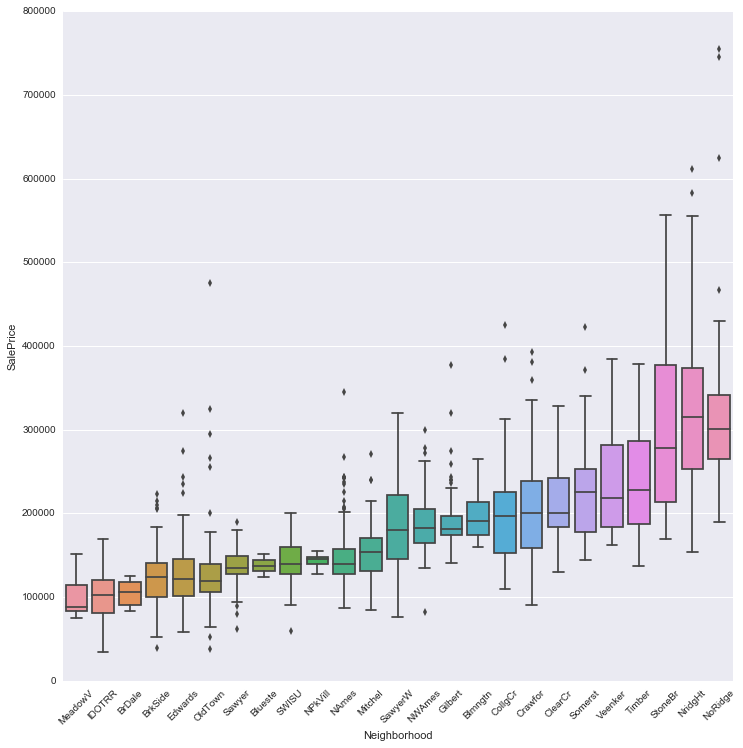

In [34]:
# Neighborhood

g1= sns.boxplot(x= 'Neighborhood', y= 'SalePrice', data= train, \
                order= train.groupby('Neighborhood')['SalePrice'].mean().sort_values().index)

g1.set_xticklabels(g1.get_xticklabels(), rotation= 45);

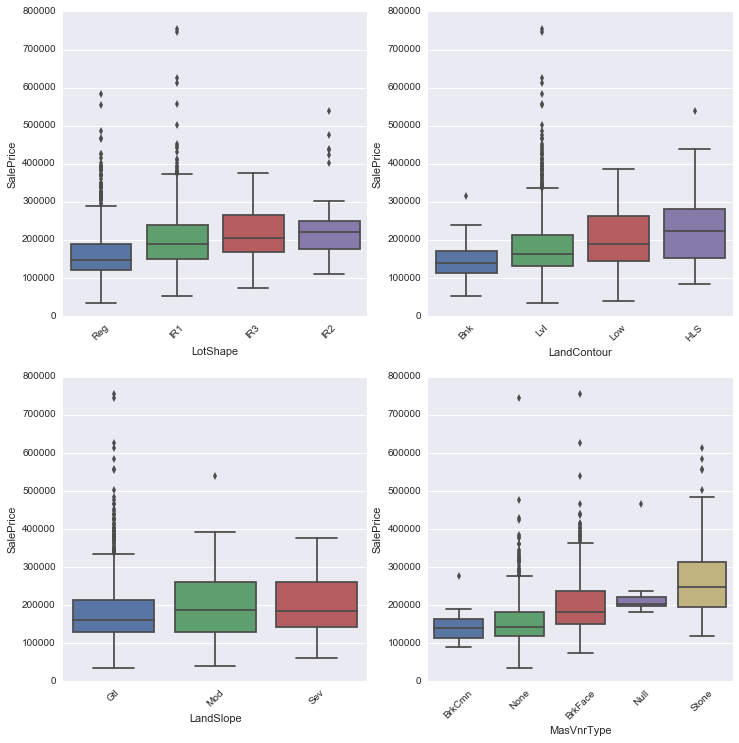

In [35]:
## Slope, shape and MasVnrType

sns.set(rc={"figure.figsize": (12, 12)},font_scale=1)
f, araxs = plt.subplots(2, 2)

g1= sns.boxplot(x= 'LotShape', y= 'SalePrice', data= train, ax= araxs[0,0], \
                order= train.groupby('LotShape')['SalePrice'].mean().sort_values().index)
g2= sns.boxplot(x='LandContour', y= 'SalePrice', data= train, ax= araxs[0,1], \
                order= train.groupby('LandContour')['SalePrice'].mean().sort_values().index)
g3= sns.boxplot(x= 'LandSlope', y= 'SalePrice', data= train, ax= araxs[1,0], \
                order= train.groupby('LandSlope')['SalePrice'].mean().sort_values().index)
g4= sns.boxplot(x='MasVnrType', y= 'SalePrice', data= train, ax= araxs[1,1], \
                order= train.groupby('MasVnrType')['SalePrice'].mean().sort_values().index)


g1.set_xticklabels(g1.get_xticklabels(), rotation= 45);
g2.set_xticklabels(g2.get_xticklabels(), rotation= 45);
g3.set_xticklabels(g3.get_xticklabels(), rotation= 45);
g4.set_xticklabels(g4.get_xticklabels(), rotation= 45);

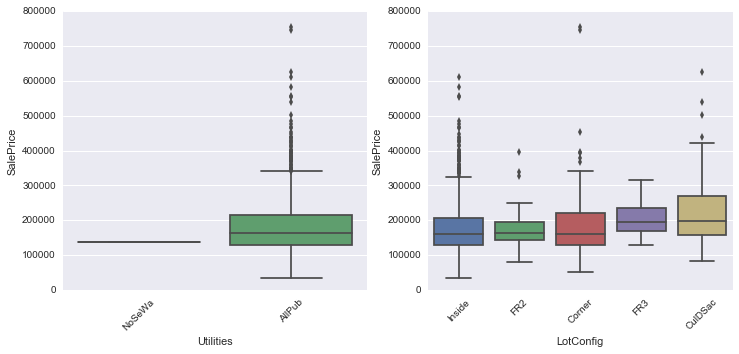

In [36]:
## Utilities and LotConfig

sns.set(rc={"figure.figsize": (12, 5)},font_scale=1)
f, (ax1, ax2) = plt.subplots(1, 2)

g1= sns.boxplot(x= 'Utilities', y= 'SalePrice', data= train, ax= ax1, \
                order= train.groupby('Utilities')['SalePrice'].mean().sort_values().index)
g2= sns.boxplot(x='LotConfig', y= 'SalePrice', data= train, ax= ax2, \
                order= train.groupby('LotConfig')['SalePrice'].mean().sort_values().index)

g1.set_xticklabels(g1.get_xticklabels(), rotation= 45);
g2.set_xticklabels(g2.get_xticklabels(), rotation= 45);

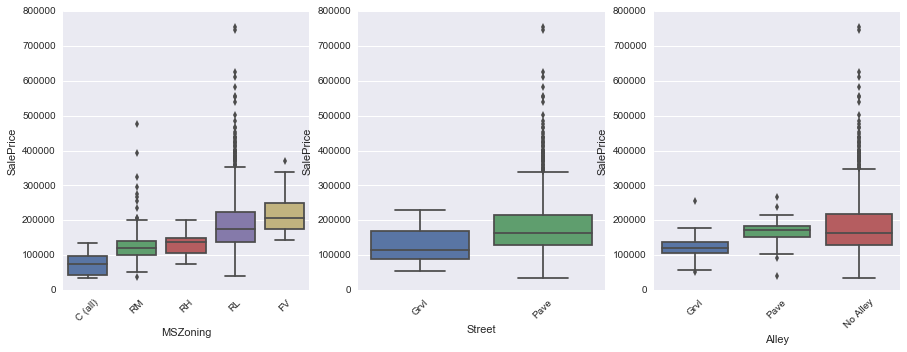

In [51]:
## MSZoning, Street and Alley

sns.set(rc={"figure.figsize": (15, 5)},font_scale=1)
f, araxs = plt.subplots(1,3)

g1= sns.boxplot(x= 'MSZoning', y= 'SalePrice', data= train, ax= araxs[0], \
                order= train.groupby('MSZoning')['SalePrice'].mean().sort_values().index)
g2= sns.boxplot(x='Street', y= 'SalePrice', data= train, ax= araxs[1], \
                order= train.groupby('Street')['SalePrice'].mean().sort_values().index)
g3= sns.boxplot(x= 'Alley', y= 'SalePrice', data= train, ax= araxs[2], \
                order= train.groupby('Alley')['SalePrice'].mean().sort_values().index)


g1.set_xticklabels(g1.get_xticklabels(), rotation= 45);
g2.set_xticklabels(g2.get_xticklabels(), rotation= 45);
g3.set_xticklabels(g3.get_xticklabels(), rotation= 45);

In [ ]:
print "# of values:",len(train)
print "# of features:",len(train.columns)

In [ ]:
train.info() # to get the full information about all the features available in data frame

In [ ]:
test.info()

Using the info function in the above train and test sets, we can clearly see that the train and test data both have missing values. 
Second point which we get from the test data set is that, it does not have the Salesprice column used for results verification. So we need to submit this model into Kaggle houseprice competition and then get the results(RMSE value i.e. how well out program performed).

# Visualizing the variables using seaborn and matplotlib 

In [ ]:
train.head()

In [ ]:
train.drop('Id',1,inplace=True) # unnecessary Index column, since we already have index values for the dataframe

In [ ]:
train['SalePrice'].describe() 

In [ ]:
sns.set(rc={"figure.figsize": (10, 5)},font_scale=1.5);
sns.distplot(train['SalePrice'])

In [ ]:
numeric_col = list(train.columns[train.dtypes != np.object])
categorical_col = list(train.columns[train.dtypes == np.object])
numeric_col.remove('SalePrice')
num_train = train[numeric_col]
cat_train = train[categorical_col]
#print numeric_col

## Numerical Variables filtering

In [ ]:
num_train.info()

In [ ]:
correlation_tab = train.corr()
plt.figure(figsize=(12,12))
sns.heatmap(correlation_tab, vmax=1, square=True)

In [ ]:
sale_price_tab = correlation_tab['SalePrice'].to_dict()
del sale_price_tab['SalePrice']
high_cor_tab = {i:sale_price_tab[i] for i in sale_price_tab.keys() if sale_price_tab[i] > 0.4 or sale_price_tab[i] < -0.4}
high_cor_tab
from collections import OrderedDict
order_high_cor_tab = OrderedDict()

In [ ]:
keys = sorted(high_cor_tab,key = lambda x: -high_cor_tab[x])
order_high_cor_tab = OrderedDict()
for key in keys:
    order_high_cor_tab[key] = high_cor_tab[key]
print order_high_cor_tab
print keys

Now that we have got the Highly correlated features for "SalePrice", it is time to remove those values which are highly correlated among themselves from this list and then plot the linearplots for those numerical models 

In [ ]:
df = correlation_tab.ix[keys,keys]
df[(df > 0.6) | (df < -0.6)]

The following are the prominent numerical features which have good correlation with SalePrice and also have less than 0.6 correlation among them.
#### 'OverallQual','GrLivArea','GarageArea','TotalBsmtSF','YearBuilt', 'YearRemodAdd','MasVnrArea', 'Fireplaces'

In [ ]:
x_features = ['OverallQual','GrLivArea','GarageArea','TotalBsmtSF','YearBuilt', 'YearRemodAdd','MasVnrArea', 'Fireplaces']
msk = np.random.rand(len(train)) < 0.75
train['MasVnrArea'] = train['MasVnrArea'].fillna(train['MasVnrArea'].mean())
x_train = train[msk]
y_train = x_train['SalePrice']
x_train = x_train[x_features]
x_test = train[~msk]
y_test = x_test['SalePrice']
x_test = x_test[x_features]

print len(x_test),len(y_test)

Here the Nan's present in x_train and x_test data frames should be changed to the mean value and scale all the numerical features

In the above numerical features only 'MasVnrArea' is the only variable with Null values in it. So update the Na's with mean value in the train df before splitting it

In [ ]:
from sklearn.linear_model import LinearRegression

# Create linear regression object
regr = LinearRegression()

# Train the model using the training sets
regr.fit(x_train, y_train)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f" % np.mean((regr.predict(x_test) - y_test) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(x_test, y_test))

# Plot outputs
plt.scatter(x_test, y_test,  color='black')
#plt.plot(x_test, regr.predict(x_test), color='blue', linewidth=3)

#plt.xticks(())
#plt.yticks(())

#plt.show()

In [ ]:
def pair_plot(x_variable):
    g = sns.lmplot(x = x_variable, y= 'SalePrice',data = train)
    g.set_xticklabels(rotation=90);
    print "Correlation Value with Sale Price %s is: %f"%(x_var,high_cor_tab[x_var])
for x_var in x_features:
    pair_plot(x_var)
    

In [ ]:
sns.boxplot(y= 'GarageArea', data= train)

In [ ]:
g = sns.pairplot(train, x_vars=['GarageCars','GarageArea','GarageYrBlt'], y_vars=["SalePrice"],
             size=5, aspect=.8, kind="reg")
#g.set_xticklabels(rotation=90)
'''
sns.pairplot(train, x_vars=['YearBuilt', 'YearRemodAdd','MasVnrArea'], y_vars=["SalePrice"],
             size=5, aspect=.8, kind="reg")

sns.pairplot(train, x_vars=['OverallQual', 'GrLivArea','TotalBsmtSF', '1stFlrSF',], y_vars=["SalePrice"],
             size=5, aspect=.8, kind="reg")

sns.pairplot(train, x_vars=['Fireplaces', 'FullBath', 'TotRmsAbvGrd'], y_vars=["SalePrice"],
             size=5, aspect=.8, kind="reg")
'''

## Categorical Variable filtering

Remove the category variables which have around 50% Null values but check wheather Na really mean Na or anything else like "No Alley" or "No Fireplace" like that.
* *<b>There are 5 variables which come under above category. But some of them have sudo Na's like Na in Alley means "No Alley access".</b>*

*Let's just check it out.*

1. *Alley*
2. <b>FireplaceQu</b> 
3. PoolQC 
4. Fence 
5. MiscFeature 

---

In [ ]:
print train['MiscFeature'].value_counts()
sns.boxplot(x= 'MiscFeature', y= 'SalePrice', data= train)

In [ ]:
## The "MiscFeature" category has a large no. of null values which doesnot give an idea about how that feature is affecting
## the house sale price. Thus we can remove it
train.drop('MiscFeature',1,inplace = 1)

In [ ]:
## For Alley NA means No Alley let`s just update it 
train['Alley'].fillna('No Alley',inplace = 1)

## For FireplaceQu NA means No Fireplace
train['FireplaceQu'].fillna("No Fireplace", inplace = 1)

## For PoolQC NA means No Pool 
train['PoolQC'].fillna('No Pool',inplace = 1)

## For Fence NA means No Fence
train['Fence'].fillna('No Fence',inplace = 1)

In [ ]:
# MSzoning
sns.boxplot(x='MSZoning',y='SalePrice',data=train)

If all the residential categories can be clubbed together and then we can finally get comercial and non-comercial categories. 
Since all the residential categories have near price range they can be clubbed together



In [ ]:
train['mod_MSZoning'] = np.where(train['MSZoning'] != 'C (all)',"Res","Com")

print train['mod_MSZoning'].value_counts()
train.drop('MSZoning',1,inplace=True)

sns.boxplot(x='mod_MSZoning',y='SalePrice',data=train)

In [ ]:
## Street
sns.boxplot(x='Street',y='SalePrice',data=train)
## This is already in 2 component format, thus can be converted into "0 and 1" for numerical purposes 

In [ ]:
## Alley, we have modified it where all NA are converted into NO Alley values
sns.boxplot(x='Alley',y='SalePrice',data=train)

The "Grvl and Pave" can be grouped into "Alley" access values as there is no huge difference between their prices.

In [ ]:
train['mod_Alley'] = np.where(train['Alley'] != 'No Alley',"Alley","No Alley")

print train['mod_Alley'].value_counts()
train.drop('Alley',1,inplace=True)

sns.boxplot(x='mod_Alley',y='SalePrice',data=train)

In [ ]:
# LotShape
sns.boxplot(x='LotShape',y='SalePrice',data=train)

In [ ]:
train['mod_LotShape'] = np.where(train['LotShape'] != 'Reg',"Irregular","Regular")

print train['mod_LotShape'].value_counts()
train.drop('LotShape',1,inplace=True)

sns.boxplot(x='mod_LotShape',y='SalePrice',data=train)

In [ ]:
## LandContour 
sns.boxplot(x= 'LandContour', y= 'SalePrice', data= train)
print train['LandContour'].value_counts()

In [ ]:
train['mod_LandContour'] = np.where(train['LandContour'] != 'Lvl',"Not Leveled","Level")

print train['mod_LandContour'].value_counts()
train.drop('LandContour',1,inplace=True)

sns.boxplot(x='mod_LandContour',y='SalePrice',data=train)

In [ ]:
sns.boxplot(x= 'Utilities', y= 'SalePrice', data= train)
print train['Utilities'].value_counts()

In [ ]:
sns.boxplot(x= 'LandSlope', y= 'SalePrice', data= train)
print train['LandSlope'].value_counts()

In [ ]:
sns.boxplot(x= 'Neighborhood', y= 'SalePrice', data= train)
print train['Neighborhood'].value_counts()

In [ ]:
sns.boxplot(x= 'Condition1', y= 'SalePrice', data= train)
print train['Condition1'].value_counts()

In [ ]:
sns.boxplot(x= 'Condition2', y= 'SalePrice', data= train)
print train['Condition2'].value_counts()

In [ ]:
sns.boxplot(x= 'BldgType', y= 'SalePrice', data= train)
print train['BldgType'].value_counts()

In [ ]:
sns.boxplot(x= 'HouseStyle', y= 'SalePrice', data= train)
print train['HouseStyle'].value_counts()

In [ ]:
fig = plt.figure()
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

sns.boxplot(x= 'RoofStyle', y= 'SalePrice', data= train, ax= ax1)
sns.boxplot(x= 'RoofMatl', y= 'SalePrice', data= train, ax= ax2)
#print train['RoofStyle'].value_counts()
#print train['RoofMatl'].value_counts()

In [ ]:
train.RoofStyle.value_counts()

In [ ]:
sns.set(rc={"figure.figsize": (15, 5)},font_scale=1.5);
f, (ax1, ax2) = plt.subplots(1, 2, sharey=False)
sns.boxplot(x= 'RoofStyle', y= 'SalePrice', data= train, ax= ax1)
sns.boxplot(x= 'RoofMatl', y= 'SalePrice', data= train, ax= ax2)

#print train['RoofStyle'].value_counts()
#print train['RoofMatl'].value_counts()

In [ ]:
remove_col = list(cat_train.columns[cat_train.isnull().sum() > 500])
remove_col

In [ ]:
train['PoolQC'].fillna('No Pool',inplace = 1)
sns.boxplot(x='PoolQC',y='SalePrice',data=train)

In [ ]:
cat_train.drop(remove_col,1,inplace=True)

In [ ]:
cat_train.columns

In [ ]:
# The rest of variables which have null values are:
t = train.isnull().sum()
t[t > 0]

In [ ]:
col_names = cat_train.columns

In [ ]:
for col in col_names:
    print cat_train[col].value_counts()

#cat_train.apply(pd.Series.value_counts)

In [ ]:
t = cat_train.isnull().sum()
t[t > 0]

In [ ]:
#sns.boxplot(x= 'MSZoning',y= 'SalePrice',data=train )

g = sns.PairGrid(train,x_vars=['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour'], y_vars=['SalePrice'],aspect=.75, size=3.5)
g.map(sns.violinplot, palette="pastel");

g = sns.PairGrid(train,x_vars=['Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1'], y_vars=['SalePrice'],aspect=.75, size=3.5)
g.map(sns.violinplot, palette="pastel");

g = sns.PairGrid(train,x_vars=['Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl'], y_vars=['SalePrice'],aspect=.75, size=3.5)
g.map(sns.violinplot, palette="pastel");

g = sns.PairGrid(train,x_vars=['Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond'], y_vars=['SalePrice'],aspect=.75, size=3.5)
g.map(sns.violinplot, palette="pastel");

g = sns.PairGrid(train,x_vars=['Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1'], y_vars=['SalePrice'],aspect=.75, size=3.5)
g.map(sns.violinplot, palette="pastel");

g = sns.PairGrid(train,x_vars=['BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical'], y_vars=['SalePrice'],aspect=.75, size=3.5)
g.map(sns.violinplot, palette="pastel");

g = sns.PairGrid(train,x_vars=['KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish'], y_vars=['SalePrice'],aspect=.75, size=3.5)
g.map(sns.violinplot, palette="pastel");

g = sns.PairGrid(train,x_vars=['GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC'], y_vars=['SalePrice'],aspect=.75, size=3.5)
g.map(sns.violinplot, palette="pastel");

g = sns.PairGrid(train,x_vars=['Fence', 'MiscFeature', 'SaleType', 'SaleCondition'], y_vars=['SalePrice'],aspect=.75, size=3.5)
g.map(sns.violinplot, palette="pastel");

In [ ]:
g = sns.PairGrid(train,x_vars=['MSZoning', 'Street', 'Alley', 'LandContour'], y_vars=['SalePrice'],aspect=.75, size=3.5)
g.map(sns.violinplot, palette="pastel");

In [ ]:
sns.set(rc={"figure.figsize": (10, 5)},font_scale=1.5);
g = sns.boxplot(x= 'Neighborhood',y= 'SalePrice',data=train).set_xticklabels(train.Neighborhood.values,rotation=90)

In [ ]:
print sum(train['MSZoning'].isnull())
sns.barplot(x= 'MSZoning',y='SalePrice',data=train)
print train['MSZoning'].value_counts()

In [ ]:
print train['Street'].value_counts()
print sum(train['Street'].isnull())
sns.barplot(x= 'Street',y='SalePrice',data=train)

In [ ]:
train.isnull().values.any() 

This shows that we have null values in our dataset. Now lets see which columns have null values in them ? 

Thus we have 19 Columns with missing values in them. 

In [ ]:
print len(train.columns[train.isnull().sum(axis = 0) > 0])
train.columns[train.isnull().sum(axis = 0) > 0]

In [ ]:
missingValue_col_list = list(train.columns[train.isnull().sum(axis = 0) > 0]) 
train[missingValue_col_list].dtypes

In [ ]:
train.isnull().sum(axis = 0)

In [ ]:
import numpy as np
import statsmodels.api as sm

y = [1,2,3,4,3,4,5,4,5,5,4,5,4,5,4,5,6,5,4,5,4,3,4]

x = [
     [4,2,3,4,5,4,5,6,7,4,8,9,8,8,6,6,5,5,5,5,5,5,5],
     [4,1,2,3,4,5,6,7,5,8,7,8,7,8,7,8,7,7,7,7,7,6,5],
     [4,1,2,5,6,7,8,9,7,8,7,8,7,7,7,7,7,7,6,6,4,4,4]
     ]

def reg_m(y, x):
    ones = np.ones(len(x[0]))
    X = sm.add_constant(np.column_stack((x[0], ones)))
    for ele in x[1:]:
        X = sm.add_constant(np.column_stack((ele, X)))
    results = sm.OLS(y, X).fit()
    return results
print reg_m(y, x).summary()

In [ ]:
sns.boxplot(x= 'SaleCondition', y= 'SalePrice', data= train)

In [ ]:
sns.boxplot(x= 'SaleType', y= 'SalePrice', data= train)

In [ ]:
train['Fence'].fillna('No Fence',inplace = True)
sns.boxplot(x= 'Fence', y= 'SalePrice', data= train)

In [ ]:
train['PoolQC'].fillna('No Pool',inplace = True)
sns.boxplot(x= 'PoolQC', y= 'SalePrice', data= train)

In [ ]:
#train['Fence'].fillna('No Fence',inplace = True)
sns.boxplot(x= 'PavedDrive', y= 'SalePrice', data= train)

In [ ]:
train['GarageType'].fillna('No Garage',inplace = True)
train['GarageCond'].fillna('No Garage',inplace = True)
train['GarageFinish'].fillna('No Garage',inplace = True)
train['GarageQual'].fillna('No Garage',inplace = True)
train['FireplaceQu'].fillna('No Fireplace',inplace = True)
train['BsmtCond'].fillna('No Basement',inplace = True)
train['BsmtQual'].fillna('No Basement',inplace = True)
train['BsmtExposure'].fillna('No Basement',inplace = True)
train['BsmtFinType1'].fillna('No Basement',inplace = True)
train['BsmtFinType2'].fillna('No Basement',inplace = True)
#sns.boxplot(x= 'GarageCond', y= 'SalePrice', data= train)

In [ ]:
print train.BsmtCond.value_counts()
print train.BsmtQual.value_counts()
print train.BsmtExposure.value_counts()
print train.BsmtFinType1.value_counts()
print train.BsmtFinType2.value_counts()

In [ ]:
cat_train.isnull().sum()

In [ ]:
train.isnull().sum()